### Week 2: K Nearest Neighbor (KNN)
###### Joel Konitzer
###### 9/3/2022

In [223]:
# pandas
import pandas as pd
import numpy as np

# sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [224]:
# loading our data set
df = pd.read_csv('../Week 1/week1prep_heart_disease.csv')

In [225]:
df = df.drop('Unnamed: 0', axis=1).copy()

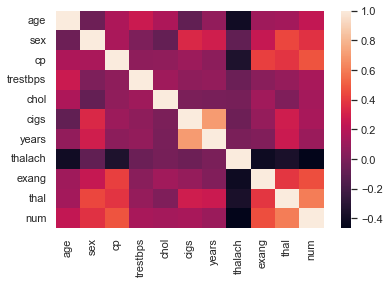

In [226]:
_ = sns.heatmap(df.corr())

In [227]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'cigs', 'years', 'thalach',
       'exang', 'thal', 'num'],
      dtype='object')

Combined 'cigs' and 'years' to create a single feature that represents daily cigs by total years smoked. A higher number will equate to an individual having smoked more cigarettes over a short period of time.

In [228]:
#Create new feature to represent both cigs and years
df['daily_cig'] = np.where(df['cigs'] == 0, 0, df.cigs/df.years)

In [229]:
# Drop unwanted columns
df.drop(['sex', 'age', 'cp','trestbps','chol','cigs','years'], axis=1, inplace=True)

In [230]:
df.head()

,thalach,exang,thal,num,daily_cig
0,108.0,1,3.0,1,1.000000
1,129.0,1,7.0,1,0.571429
2,187.0,0,3.0,0,0.000000
3,172.0,0,3.0,0,0.000000
4,178.0,0,3.0,0,1.000000


##### Creating two additional datasets for standardized and normalized data for comparision

In [231]:
#Create standardized  dataframe
std_scale = preprocessing.StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(std_scale,columns=df.columns)

#Create normalized dataframe
minmax_scale = preprocessing.MinMaxScaler().fit_transform(df)
df_norm = pd.DataFrame(minmax_scale,columns=df.columns)

##### Setting target and feature columns for each training and testing dataset

In [232]:
cols = df.columns
#Target column for heart disease, negative = num > 0 
target_col = 'num'
#Select only feature columns
feat_cols = [c for c in cols if c != target_col]

# Set feature variables for each dataframe
X = df[feat_cols].values
X_scale = preprocessing.StandardScaler().fit_transform(df[feat_cols].values)
X_norm = preprocessing.MinMaxScaler().fit_transform(df[feat_cols].values)

#Set target variable
y = df[target_col].values

##### Create train and test datasets for all dataframes

In [233]:
#Original dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Scaled dataframe
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_scale, y, test_size=0.2, random_state=42)
#Normalized dataframe
X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(X_norm, y, test_size=0.2, random_state=42)

### Original dataframe - 1-nearest neighbor

In [234]:
# define and fit our model
model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [235]:
# gather the predictations that our model made for our test set
preds = model.predict(X_test)
# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('____________________________________________________')
print('Predictions for test data set')
print(preds)
print('____________________________________________________')
#compare the two sets for 'subscribed'
differs = y_test - preds
print('Differences between the two sets')
print(differs)
print('____________________________________________________')
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative 
# (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 0.0.
from sklearn.metrics import r2_score
print('Coefficient of determination: {:.3f}'.format(r2_score(y_test,preds)))
print('____________________________________________________')
# Explained variance regression score function
# Best possible score is 1.0, lower values are worse.
from sklearn.metrics import explained_variance_score
print('Variance regression score: {:.3f}'.format(explained_variance_score(y_test,preds)))
print('____________________________________________________')
print('Test set accuracy: {:.3f}'.format(model.score(X_test, y_test)))

Actuals for test data set
[0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 0 0 0]
____________________________________________________
Predictions for test data set
[0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0
 0 0 1 1 1 1 1 0 0 0]
____________________________________________________
Differences between the two sets
[ 0  1  0 -1 -1 -1  1  0  1  0  0 -1 -1  0 -1  0  0  0 -1  1  1  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0]
____________________________________________________
Coefficient of determination: -0.237
____________________________________________________
Variance regression score: -0.207
____________________________________________________
Test set accuracy: 0.702


### Performance measures

#### Confusion Matrix - evaluating performance
- Top left - true negatives
- Top right - false positives
- Bottom left - false negatives
- Bottom right - true positives

In [236]:
#Setting up a confusion matrix to visualize K=1 model performance
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[82, 20],
       [25, 61]], dtype=int64)

Higher false positives than wanting

In [237]:
from sklearn.metrics import precision_score, recall_score
print('Precision score: {:.3f}'.format(precision_score(y_train, y_train_pred))) # == 4096 / (4096 + 1522)
print('Recall score: {:.3f}'.format(recall_score(y_train, y_train_pred))) # == 4096 / (4096 + 1325)

Precision score: 0.753
Recall score: 0.709


Combing the scores above into F1. The higher the score, the more "balanced" model performance will be.

In [238]:
from sklearn.metrics import f1_score
print('F1 score: {:.3f}'.format(f1_score(y_train, y_train_pred))) # == 4096 / (4096 + 1325)

F1 score: 0.731


#### Cross validation - measuring accuracy 

In [239]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(model)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.7894736842105263
0.7105263157894737
0.6842105263157895
0.6756756756756757
0.8108108108108109


Another way to cross validate..

In [240]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('CV mean: {:.3f}'.format(np.mean(cv_scores)))

[0.76315789 0.84210526 0.73684211 0.67567568 0.78378378]
CV mean: 0.760


Our expectations from this model are that performance to stays around 0.76

#### Testing a on random sample of original dataframe

In [241]:
sample_test = df.sample(10) # Select 10 random observations
sample_target = sample_test.num
sample_features = sample_test.drop('num',axis=1)
sample_test['prediction_num'] = clone_clf.predict(sample_features) # Run prediction

In [242]:
# The new column 'prediction_num' will display the predicted values
sample_test

,thalach,exang,thal,num,daily_cig,prediction_num
138,122.0,0,3.0,0,0.000000,0
170,147.0,1,7.0,1,0.000000,1
125,179.0,0,3.0,0,1.000000,0
196,116.0,1,3.0,1,0.000000,0
164,152.0,1,3.0,0,0.600000,0
108,163.0,0,3.0,0,0.000000,0
211,157.0,0,3.0,0,0.000000,0
126,170.0,0,3.0,0,0.000000,0
210,105.0,1,7.0,0,1.142857,1
219,152.0,0,3.0,1,0.400000,1


## Determining the optimal number of clusters
* Finding the optimal clusters for the original, scalled, and normalized dataset.
    * Setting maxK as the maximum number of evaluated clusters
###  1. Original dataframe
    - Train the each dataframe using max 10 neighbors
    - Use the max score from each dataframe to measure performance

In [243]:
#Set max K for all runs
maxK = 10
#Using the following features..and target variables
print(f'Features: {feat_cols} \nTarget: {target_col}')

Features: ['thalach', 'exang', 'thal', 'daily_cig'] 
Target: num


Evaluating 1 clusters
Score 0.702
Evaluating 2 clusters
Score 0.702
Evaluating 3 clusters
Score 0.723
Evaluating 4 clusters
Score 0.681
Evaluating 5 clusters
Score 0.745
Evaluating 6 clusters
Score 0.787
Evaluating 7 clusters
Score 0.745
Evaluating 8 clusters
Score 0.787
Evaluating 9 clusters
Score 0.723


Text(0, 0.5, 'Score')

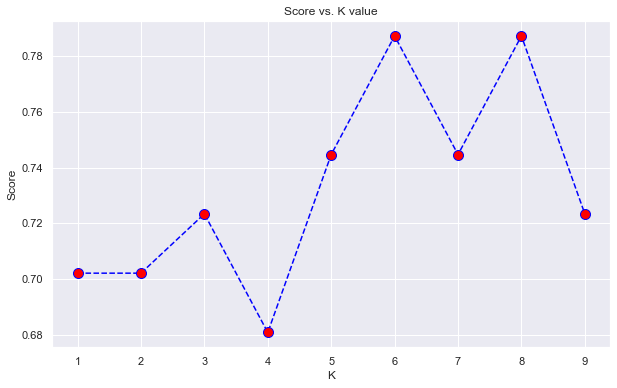

In [244]:
scores = []
for k in range(1, maxK):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    print('Score {:.3f}'.format(model.score(X_test, y_test)))
    
# display the resutls
plt.figure(figsize=(10,6))
plt.plot(range(1,maxK),scores,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Score vs. K value')
plt.xlabel('K')
plt.ylabel('Score')

#### Error rate, original dataframe

Minimum error: 0.213


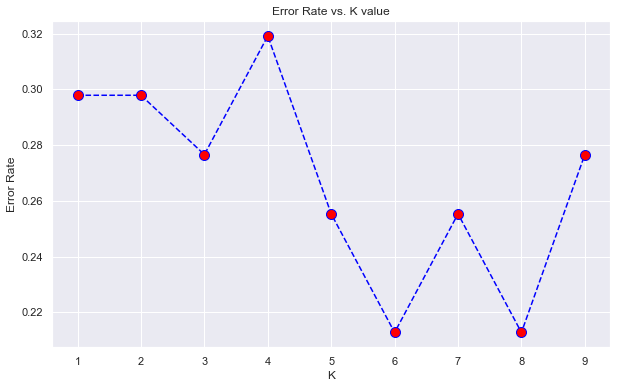

In [245]:
error_rate = []
for i in range(1,maxK):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,maxK),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print('Minimum error: {:.3f}'.format(min(error_rate),"at K =",error_rate.index(min(error_rate))))

#### Accuracy, original dataframe

Maximum accuracy: 0.787


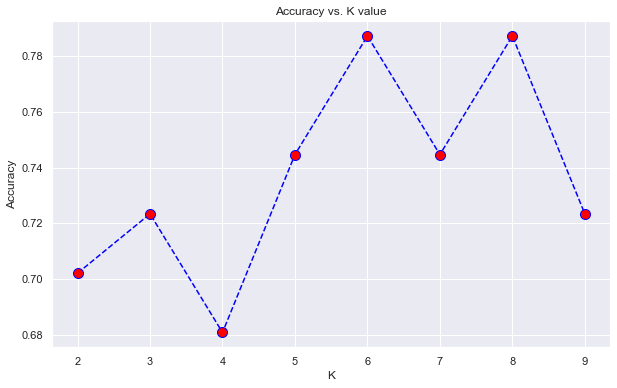

In [246]:
acc = []
for i in range(2,maxK):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(2,maxK),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print('Maximum accuracy: {:.3f}'.format(max(acc),"at K =",acc.index(max(acc))))

In [247]:
#Getting K for the max score
opt_K = acc.index(max(acc)) + 1
# define and fit our model
model = KNeighborsClassifier(n_neighbors=opt_K, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [248]:
# gather the predictations that our model made for our test set
preds = model.predict(X_test)
# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('____________________________________________________')
print('Predictions for test data set')
print(preds)
print('____________________________________________________')
#compare the two sets for 'subscribed'
differs = y_test - preds
print('Differences between the two sets')
print(differs)
print('____________________________________________________')
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative 
# (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 0.0.
from sklearn.metrics import r2_score
print('Coefficient of determination:: {:.3f}'.format(r2_score(y_test,preds)))
print('____________________________________________________')
# Explained variance regression score function
# Best possible score is 1.0, lower values are worse.
from sklearn.metrics import explained_variance_score
print('Variance regression score: {:.3f}'.format(explained_variance_score(y_test,preds)))
print('____________________________________________________')
print("Test set accuracy: {:.3f}".format(model.score(X_test, y_test)))

Actuals for test data set
[0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 0 0 0]
____________________________________________________
Predictions for test data set
[0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0
 0 0 0 1 1 1 1 0 0 0]
____________________________________________________
Differences between the two sets
[ 0  0  0 -1  0 -1  0  0  1  0  0 -1  0  0 -1  0  0  0 -1  1  0  0  0  0
  0 -1 -1  0  0  0 -1  0  0  0  0  0  0  0  0  1  0 -1  0  0  0  0  0]
____________________________________________________
Coefficient of determination:: -0.060
____________________________________________________
Variance regression score: 0.008
____________________________________________________
Test set accuracy: 0.745


### 2. Scalled dataframe

Features: ['thalach', 'exang', 'thal', 'daily_cig'] 
Target: num
Evaluating 1 clusters
Score: 0.745
Evaluating 2 clusters
Score: 0.787
Evaluating 3 clusters
Score: 0.745
Evaluating 4 clusters
Score: 0.787
Evaluating 5 clusters
Score: 0.745
Evaluating 6 clusters
Score: 0.830
Evaluating 7 clusters
Score: 0.830
Evaluating 8 clusters
Score: 0.830
Evaluating 9 clusters
Score: 0.830


Text(0, 0.5, 'Scaled score')

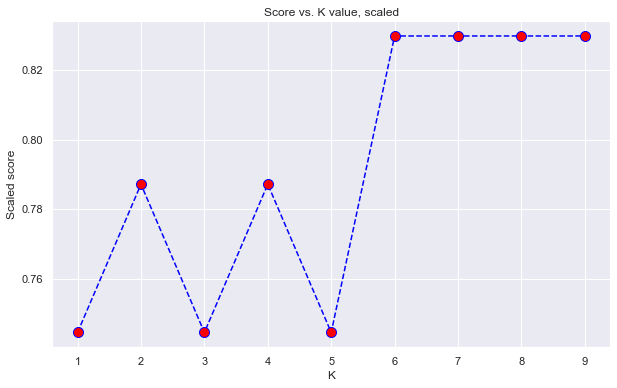

In [249]:
scores_S = []
print(f'Features: {feat_cols} \nTarget: {target_col}')
# remember the ending number for range is not inclusive
for k in range(1, maxK):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    # n_jobs=-1 will use all processors on your system
    model_S = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model_S.fit(X_train_S, y_train_S)
    scores_S.append(model_S.score(X_test_S, y_test_S))
    print('Score: {:.3f}'.format(model_S.score(X_test_S, y_test_S)))
    
# display the resutls
plt.figure(figsize=(10,6))
plt.plot(range(1,maxK),scores_S,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Score vs. K value, scaled')
plt.xlabel('K')
plt.ylabel('Scaled score')

#### Error rate, scaled dataset

Scaled Minimum error: 0.170


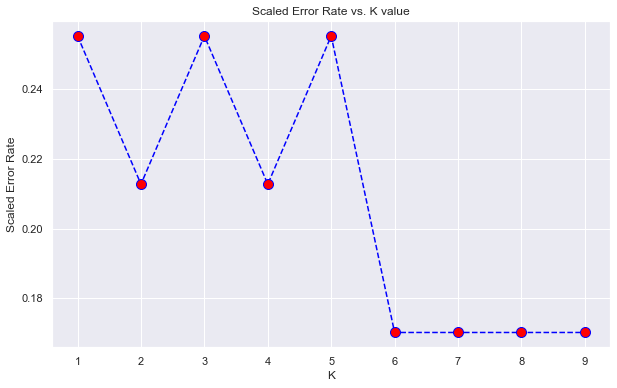

In [250]:
error_rate_S = []
for i in range(1,maxK):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_S,y_train_S)
    pred_i_S = knn.predict(X_test_S)
    error_rate_S.append(np.mean(pred_i_S != y_test_S))
plt.figure(figsize=(10,6))
plt.plot(range(1,maxK),error_rate_S,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Scaled Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Scaled Error Rate')
print("Scaled Minimum error: {:.3f}".format(min(error_rate_S),"at K =",error_rate_S.index(min(error_rate_S))))

#### Accuracy, scalled dataframe

Maximum accuracy, scaled: 0.830


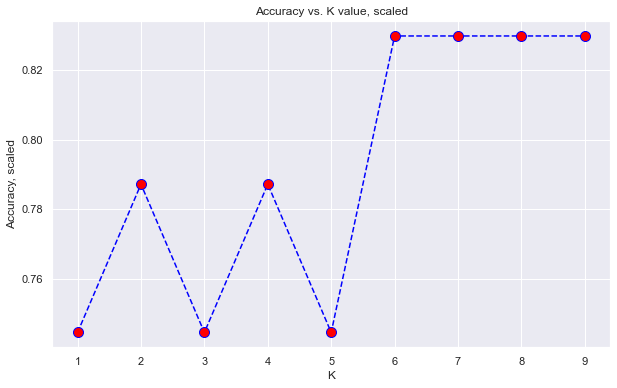

In [251]:
acc_S = []
for i in range(1,maxK):
    neigh_S = KNeighborsClassifier(n_neighbors = i).fit(X_train_S,y_train_S)
    yhat_S = neigh_S.predict(X_test_S)
    acc_S.append(metrics.accuracy_score(y_test_S, yhat_S))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,maxK),acc_S,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K value, scaled')
plt.xlabel('K')
plt.ylabel('Accuracy, scaled')
print("Maximum accuracy, scaled: {:.3f}".format(max(acc_S),"at K =",acc_S.index(max(acc_S))))

In [252]:
#Getting K for the max score
opt_K_S = acc_S.index(max(acc_S)) + 1
# define and fit our model
model_S = KNeighborsClassifier(n_neighbors=opt_K_S, n_jobs=-1)
model_S.fit(X_train_S, y_train_S)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [253]:
# Gather predictions
preds_S = model_S.predict(X_test_S)
# Display predictions
print('Actuals for scaled test data set')
print(y_test_S)
print('____________________________________________________')
print('Predictions for scaled test data set')
print(preds_S)
print('____________________________________________________')
# Compare each set
differs_S = y_test_S - preds_S
print('Differences between the two scaled sets')
print(differs_S)
print('____________________________________________________')
from sklearn.metrics import r2_score
print('Coefficient of determination, scaled: {:.3f}'.format(r2_score(y_test_S,preds_S)))
print('____________________________________________________')
from sklearn.metrics import explained_variance_score
print('Variance regression score, scaled: {:.3f}'.format(explained_variance_score(y_test_S,preds_S)))
print('____________________________________________________')
print('Test set accuracy, scaled: {:.3f}'.format(model_S.score(X_test_S, y_test_S)))

Actuals for scaled test data set
[0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 0 0 0]
____________________________________________________
Predictions for scaled test data set
[0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 1 0 1 1 0 0 0]
____________________________________________________
Differences between the two scaled sets
[ 0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0 -1  1  0  0  0  0
  0  0  0  0  0  0 -1  0  1  0  0  0  0  0 -1  1  0  0  0  0  0  0  0]
____________________________________________________
Coefficient of determination, scaled: 0.293
____________________________________________________
Variance regression score, scaled: 0.301
____________________________________________________
Test set accuracy, scaled: 0.830


### 3. Normalized dataframe

Evaluating 2 clusters
Normalized score 0.766
Evaluating 3 clusters
Normalized score 0.766
Evaluating 4 clusters
Normalized score 0.766
Evaluating 5 clusters
Normalized score 0.745
Evaluating 6 clusters
Normalized score 0.745
Evaluating 7 clusters
Normalized score 0.766
Evaluating 8 clusters
Normalized score 0.809
Evaluating 9 clusters
Normalized score 0.830


Text(0, 0.5, 'Normalized score')

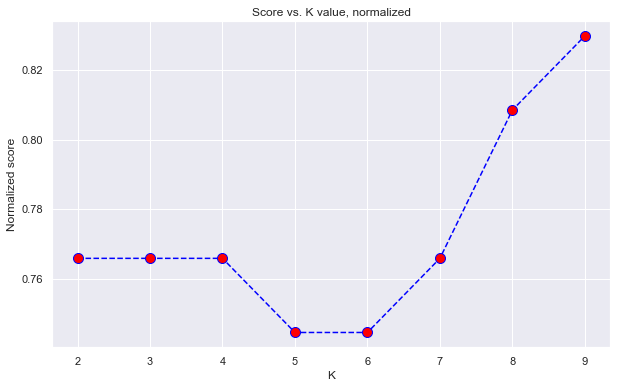

In [254]:
scores_N = []
for k in range(2, maxK):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    # n_jobs=-1 will use all processors on your system
    model_N = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model_N.fit(X_train_N, y_train_N)
    scores_N.append(model_N.score(X_test_N, y_test_N))
    print('Normalized score {:.3f}'.format(model_N.score(X_test_N, y_test_N)))

plt.figure(figsize=(10,6))
plt.plot(range(2,maxK),scores_N,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Score vs. K value, normalized')
plt.xlabel('K')
plt.ylabel('Normalized score')

#### Error rate, normalized dataframe

Minimum error, normalized: 0.170


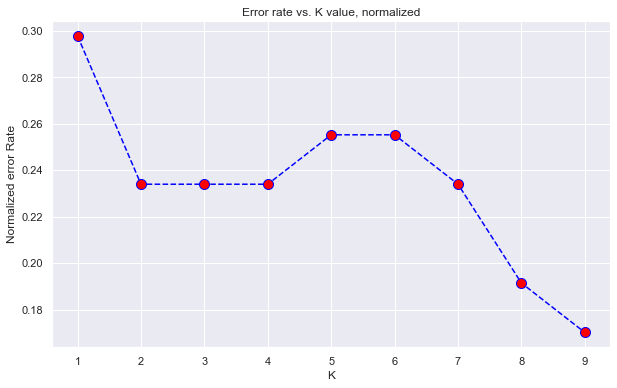

In [255]:
error_rate_N = []
for i in range(1,maxK):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_N,y_train_N)
    pred_i_N = knn.predict(X_test_N)
    error_rate_N.append(np.mean(pred_i_N != y_test_N))
plt.figure(figsize=(10,6))
plt.plot(range(1,maxK),error_rate_N,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error rate vs. K value, normalized')
plt.xlabel('K')
plt.ylabel('Normalized error Rate')
print("Minimum error, normalized: {:.3f}".format(min(error_rate_N),"at K =",error_rate_N.index(min(error_rate_N))))

#### Accuracy, normalized dataframe

Maximum accuracy, normalized: 0.830


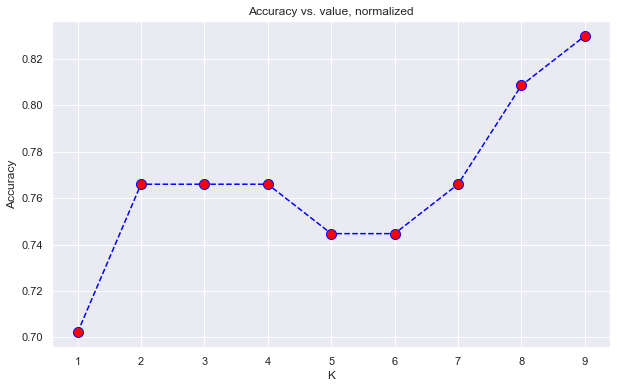

In [256]:
acc_N = []
for i in range(1,maxK):
    neigh_N = KNeighborsClassifier(n_neighbors = i).fit(X_train_N,y_train_N)
    yhat_N = neigh_N.predict(X_test_N)
    acc_N.append(metrics.accuracy_score(y_test_N, yhat_N))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,maxK),acc_N,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. value, normalized')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy, normalized: {:.3f}".format(max(acc_N),"at K =", acc_N.index(max(acc_N))))

In [257]:
#Getting K for the max score
opt_K_N = acc_N.index(max(acc_N)) + 1
# define and fit our model
model_N = KNeighborsClassifier(n_neighbors=opt_K_N, n_jobs=-1)
model_N.fit(X_train_N, y_train_N)

KNeighborsClassifier(n_jobs=-1, n_neighbors=9)

In [258]:
# gather the predictations that our model made for our test set
preds_N = model_N.predict(X_test_N)
# display the actuals and predictions for the test set
print('Actuals for normalized test data set')
print(y_test_N)
print('____________________________________________________')
print('Predictions for normalized test data set')
print(preds_N)
print('____________________________________________________')
#compare the two sets for 'subscribed'
differs_N = y_test_N - preds_N
print('Differences between the two normalized sets')
print(differs_N)
print('____________________________________________________')
from sklearn.metrics import r2_score
print('Coefficient of determination, normalized:{:.3f}'.format(r2_score(y_test_N, preds_N)))
print('____________________________________________________')
from sklearn.metrics import explained_variance_score
print('Variance regression score, normalized:{:.3f}'.format(explained_variance_score(y_test_N, preds_N)))
print('____________________________________________________')
print('Test set accuracy, normalized:{:.3f}'.format(model_N.score(X_test_N, y_test_N)))

Actuals for normalized test data set
[0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 0 0 0]
____________________________________________________
Predictions for normalized test data set
[0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0
 0 1 0 1 0 1 1 0 0 0]
____________________________________________________
Differences between the two normalized sets
[ 0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0 -1  1  0  0  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0]
____________________________________________________
Coefficient of determination, normalized:0.293
____________________________________________________
Variance regression score, normalized:0.323
____________________________________________________
Test set accuracy, normalized:0.830


##### Summary of results
This analysis demonstrated the k-nearest neighbor algorithm's predictive power and how the most minor changes to a data frame can drastically alter model performance. I created a well-performing model through normalization and feature engineering of the cleaned dataset from last week. The new feature I created combined the 'cigs' with 'years' to represent the smoking rate, and the damage smoking does. The analysis is broken up into two parts, the first is a breakdown of model performance and evaluation with 1-nearest neighbor using the original data frame, and the second is the performance for the model created from the transformed datasets, scaled and normalized. The results from the transformed data frames exceeded the original data frame. However, the scaled and normalized data frame had very similar max accuracy and min error scores, so by looking at variance, we can say because the scaled data frame has lower variance, it would be preferred over the normalized dataset.
###### 3.1. cross-validation: Evaluating estimator performance. scikit. (n.d.). Retrieved September 4, 2022, from https://scikit-learn.org/stable/modules/cross_validation.html 
###### Allibhai, E. (2018, October 2). Building a K-nearest-neighbors (K-nn) model with Scikit-Learn. Medium. Retrieved September 4, 2022, from https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a 